In [1]:
import pandas as pd

# import openpyxl as xl

In [2]:
plan = pd.read_excel('reshaping.xlsx')

plan.head(10)

,Estudante,Categoria,Semana,Tópico,Nota
0,Maria,Testes,1,1. Python,100
1,Maria,Projeto,1,1. Python,100
2,Maria,Testes,1,2. GitHub,70
3,Maria,Projeto,1,2. GitHub,70
4,Maria,Testes,2,3. Matplotlib,80
5,Maria,Projeto,2,3. Matplotlib,70
6,Maria,Testes,2,4. SQL,80
7,Maria,Projeto,2,4. SQL,70
8,Maria,Testes,3,5. NumPy,60
9,Maria,Projeto,3,5. NumPy,60


### Pivot
### mudar a estrtura da tabela, sem alterar as informações da mesma

In [3]:
plan_pivot = plan.pivot(
    index= ['Estudante'],
    columns= ['Categoria', 'Semana', 'Tópico'],
    values= 'Nota' ,
)

plan_pivot

Categoria,Testes,Projeto,Testes,Projeto,Testes,Projeto,Testes,Projeto,Testes,Projeto,Testes,Projeto,Testes,Projeto,Testes,Projeto
Semana,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4
Tópico,1. Python,1. Python,2. GitHub,2. GitHub,3. Matplotlib,3. Matplotlib,4. SQL,4. SQL,5. NumPy,5. NumPy,6. POO,6. POO,7. Pandas,7. Pandas,8. Estatística,8. Estatística
Estudante,,,,,,,,,,,,,,,,
João,100,80,90,90,60,70,70,80,80,90,70,80,70,100,80,90
Maria,100,100,70,70,80,70,80,70,60,60,90,80,70,70,80,80


### Pode mudar colunas em linhas

In [4]:
plan_pivot.stack(level=0)

C:\Users\criat\AppData\Local\Temp\ipykernel_9252\3233526206.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  plan_pivot.stack(level=0)


Semana                      1                       2               3         \
Tópico              1. Python 2. GitHub 3. Matplotlib 4. SQL 5. NumPy 6. POO   
Estudante Categoria                                                            
João      Projeto          80        90            70     80       90     80   
          Testes          100        90            60     70       80     70   
Maria     Projeto         100        70            70     70       60     80   
          Testes          100        70            80     80       60     90   

Semana                      4                 
Tópico              7. Pandas 8. Estatística  
Estudante Categoria                           
João      Projeto         100             90  
          Testes           70             80  
Maria     Projeto          70             80  
          Testes           70             80

In [5]:
cereal = pd.read_csv('cereal.csv')
cereal.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [6]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


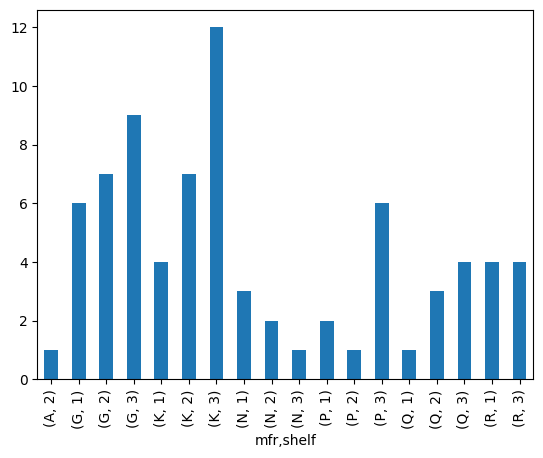

In [7]:
cereal.groupby(['mfr', 'shelf']).size().plot(kind='bar',)
import matplotlib.pyplot as plt
plt.show()


In [8]:
cereal.groupby(['mfr', 'shelf']).size().unstack()

shelf,1,2,3
mfr,,,
A,NaN,1.0,NaN
G,6.0,7.0,9.0
K,4.0,7.0,12.0
N,3.0,2.0,1.0
P,2.0,1.0,6.0
Q,1.0,3.0,4.0
R,4.0,NaN,4.0


<Axes: xlabel='mfr'>

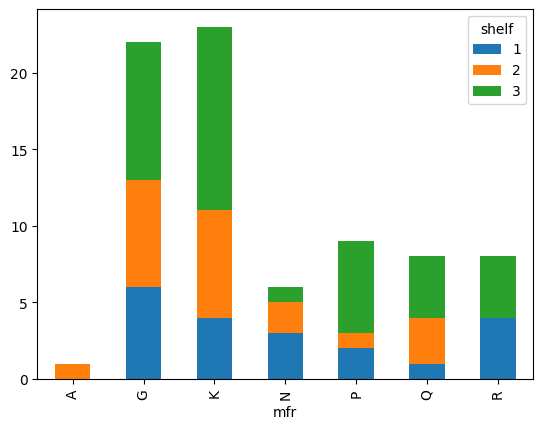

In [9]:
cereal.groupby(['mfr', 'shelf']).size().unstack().plot(kind='bar', stacked=True)
